##########################################################################################
##########################################LABELS##########################################
actioncable                             3                   
actionmailbox                           1                   
actionmailer                            1                   
actionpack                              22                  
actiontext                              2                   
actionview                              16                  
activemodel                             8                   
activerecord                            110                 
activestorage                           21                  
activesupport                           40                  
asset pipeline                          1                   
attached PR                             22                  
autoloading                             1                   
docs                     

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


[10.352777777777778, 18.12972222222222, 0.10555555555555556, 2.7980555555555555, 29.190555555555555, 2.2630555555555554, 1.7294444444444443, 21.391666666666666, 23.81138888888889, 6.123888888888889, 3.9819444444444443, 8.648888888888887, 48.1775, 0.09833333333333334, 6.401944444444444, 0.5883333333333333, 0.3777777777777778, 43.25055555555556, 25.659166666666668, 6.209722222222222, 10.948888888888888, 22.565, 25.83083333333333, 0.01138888888888889, 22.96861111111111, 15.161666666666667, 0.15972222222222224, 0.5097222222222222, 40.72944444444445, 3.980277777777778, 0.8847222222222223, 6.883888888888889, 10.388055555555555, 144.32805555555555, 15.946944444444446, 15.755833333333333, 24.63222222222222, 0.12305555555555556, 1.2233333333333334, 164.08333333333334, 164.5511111111111, 119.86694444444444, 1.0372222222222223, 0.6708333333333333, 56.70444444444445, 167.7227777777778, 92.03305555555556, 21.986944444444443, 0.7825000000000001, 0.8583333333333333, 0.14194444444444446, 2.21944444444

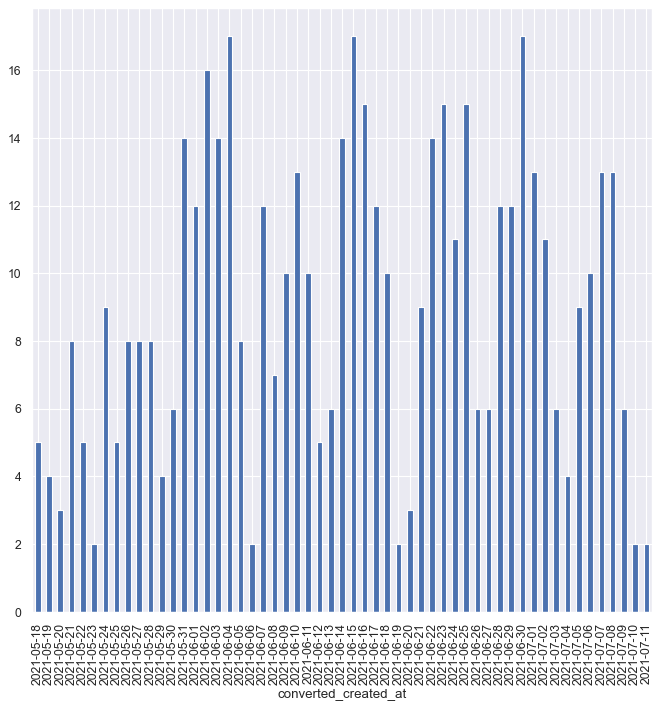

In [417]:
import pandas as pd
import ast
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib.pyplot import figure
import seaborn as sns
from numpy import nan
from numpy import array
from collections import Counter
from itertools import chain
import operator
from functools import reduce

df = pd.read_csv (r'C:\Users\USER\Retrieve_Rail.csv')
#print(df.columns)

to_be_dropped=['milestone', 'assignee.login',
       'assignee.id', 'assignee.node_id', 'assignee.avatar_url',
       'assignee.gravatar_id', 'assignee.url', 'assignee.html_url',
       'assignee.followers_url', 'assignee.following_url',
       'assignee.gists_url', 'assignee.starred_url',
       'assignee.subscriptions_url', 'assignee.organizations_url',
       'assignee.repos_url', 'assignee.events_url',
       'assignee.received_events_url', 'assignee.type', 'assignee.site_admin',
       'milestone.url', 'milestone.html_url', 'milestone.labels_url',
       'milestone.id', 'milestone.node_id', 'milestone.number',
       'milestone.title', 'milestone.description', 'milestone.creator.login',
       'milestone.creator.id', 'milestone.creator.node_id',
       'milestone.creator.avatar_url', 'milestone.creator.gravatar_id',
       'milestone.creator.url', 'milestone.creator.html_url',
       'milestone.creator.followers_url', 'milestone.creator.following_url',
       'milestone.creator.gists_url', 'milestone.creator.starred_url',
       'milestone.creator.subscriptions_url',
       'milestone.creator.organizations_url', 'milestone.creator.repos_url',
       'milestone.creator.events_url', 'milestone.creator.received_events_url',
       'milestone.creator.type', 'milestone.creator.site_admin',
       'milestone.open_issues', 'milestone.closed_issues', 'milestone.state',
       'milestone.created_at', 'milestone.updated_at', 'milestone.due_on',
       'milestone.closed_at']


df.drop(columns=to_be_dropped, inplace= True)
i=0
for index, row in df.iterrows():
    res=df.labels[index]
    Converted_res = ast.literal_eval(res)
    if len(Converted_res) != 0:
            for i in range(len(Converted_res)):
                field="LABEL_"+str(len(Converted_res))
                df.at[index,{field}]=Converted_res[i]['name']
                field="NODE_"+str(len(Converted_res))
                df.at[index,{field}]=Converted_res[i]['node_id']
    else:
            df.at[index, "LABEL_0"]="None"
            df.at[index, "NODE_0"]="None"
temp_created_at = df['created_at']
for index, row in df.iterrows():
    converted_created_at[index]=pd.to_datetime(temp_created_at[index][:10], format = '%Y-%m-%d').date()
df['converted_created_at']=converted_created_at
gk = df.groupby('converted_created_at').count()
figure(figsize=(10, 10), dpi=80)
gk['id'].plot.bar()

#LABELS COUNT
LABELS = df[["LABEL_1", "LABEL_2","LABEL_3","LABEL_4","LABEL_5","LABEL_6"]]
LABELS_List=LABELS.values.tolist()
type(LABELS_List)
UNIQUE_LABELS=np.unique(reduce(operator.add, LABELS_List))
DICT_LABELS = {}
for i in range (len(UNIQUE_LABELS)):
    TMP=sum(x.count(UNIQUE_LABELS[i]) for x in LABELS_List)
    DICT_LABELS[UNIQUE_LABELS[i]]=TMP  
keys = DICT_LABELS.keys()
values = DICT_LABELS.values()
format = "{:<40}{:<20}"    
print("##########################################################################################")
print("##########################################LABELS##########################################")
#print(format.format("LABEL","COUNT"))
for label,count in DICT_LABELS.items():
    print(format.format(label,count))

#NODES COUNT

NODES = df[["NODE_1", "NODE_2","NODE_3","NODE_4","NODE_5","NODE_6"]]
NODES_List=NODES.values.tolist()
type(NODES_List)
UNIQUE_NODES=np.unique(reduce(operator.add, NODES_List))
DICT_NODES = {}
for i in range (len(UNIQUE_NODES)):
    TMP=sum(x.count(UNIQUE_NODES[i]) for x in NODES_List)
    DICT_NODES[UNIQUE_NODES[i]]=TMP
keys = DICT_NODES.keys()
values = DICT_NODES.values()
format = "{:<40}{:<20}"   
print("##########################################################################################")
print("##########################################NODES##########################################")

for node,count in DICT_NODES.items():
    print(format.format(node,count))
#Print the list of users who created the most number of issues
print("##########################################################################################")
print("################################List of top issues creators###############################")

print(df['user.login'].value_counts().nlargest(15))


# Treatment time
Resolution_Mean=[]
TIMES = df[["created_at", "closed_at"]]
for index, row in TIMES.iterrows():
    if len(str(TIMES["closed_at"][index]))>3:
        #print(len(str(TIMES["closed_at"][index])))
        #print(TIMES["closed_at"][index])
        TIMES["created_at"][index]=TIMES["created_at"][index].replace('T', ' ')
        TIMES["created_at"][index]=TIMES["created_at"][index].replace('Z', '')
        TIMES["closed_at"][index]=TIMES["closed_at"][index].replace('T', ' ')
        TIMES["closed_at"][index]=TIMES["closed_at"][index].replace('Z', '')
        date_time_str_crea = TIMES["created_at"][index]
        date_time_obj_crea = datetime.strptime(date_time_str_crea, '%Y-%m-%d %H:%M:%S')
        date_time_str_clo = TIMES["closed_at"][index]
        date_time_obj_clo = datetime.strptime(date_time_str_clo, '%Y-%m-%d %H:%M:%S')
        diff=date_time_obj_clo-date_time_obj_crea
        total_seconds = diff.total_seconds()
        minutes = total_seconds/60/60
        #print(minutes)
        Resolution_Mean.append(minutes)
print(Resolution_Mean)
Resolution_Mean_df = pd.DataFrame(Resolution_Mean,columns=['Resolution time'])
print(Resolution_Mean_df.describe())
#print(TIMES["created_at"][0])
#TIMES["created_at"][0]=TIMES["created_at"][0].replace('T', ' ')
#TIMES["created_at"][0]=TIMES["created_at"][0].replace('Z', '')
#print(TIMES["closed_at"][3])
#TIMES["closed_at"][3]=TIMES["closed_at"][3].replace('T', ' ')
#TIMES["closed_at"][3]=TIMES["closed_at"][3].replace('Z', '')
#print(TIMES["created_at"][0])
#print(TIMES["closed_at"][5])
#created_at_obj = datetime.strptime(TIMES["created_at"][0], '%Y-%m-%dT%H:%M:%S:%fZ')
#closed_at_obj = datetime.strptime(TIMES["closed_at"][1], '%Y-%m-%d %H:%M:%S')
#print(type(date_time_obj))



#date_time_str_crea = TIMES["created_at"][0]
#date_time_obj_crea = datetime.strptime(date_time_str_crea, '%Y-%m-%d %H:%M:%S')
#date_time_str_clo = TIMES["closed_at"][3]
#date_time_obj_clo = datetime.strptime(date_time_str_clo, '%Y-%m-%d %H:%M:%S')
#diff=date_time_obj_clo-date_time_obj_crea
#total_seconds = diff.total_seconds()
#minutes = total_seconds/60
#print(minutes)
#print('Date:', date_time_obj.date())
#print('Time:', date_time_obj.time())
#print('Date-time:', date_time_obj)
    
 
    
    
df.to_csv('RAIL_OUTPUT.csv', index=False)   
